We will train a bunch of ssfas while dropping samples. The idea is to see if we can recover similar factors with less data

In [1]:
from sfa import SparseFactorAnalyzer
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
data_path = 'data/variance_stabilized.csv'
pheno_path = 'data/phenotype.csv'
data = pd.read_csv(data_path, index_col=0)
phenotype = pd.read_csv(pheno_path, index_col=0)

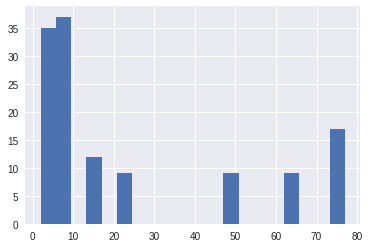

In [4]:
plt.hist(phenotype.DAY, bins=20)
plt.show()

In [18]:
np.random.seed(121)
phenotype20 = phenotype.groupby('DAY').apply(lambda x: x.sample(frac=0.2))
phenotype40 = phenotype.groupby('DAY').apply(lambda x: x.sample(frac=0.4))
phenotype60 = phenotype.groupby('DAY').apply(lambda x: x.sample(frac=0.6))
phenotype80 = phenotype.groupby('DAY').apply(lambda x: x.sample(frac=0.8))
phenotype100 = phenotype

In [21]:
small_data = data.loc[data.var(axis=1).nlargest(10000).index]
small_data = data.loc[small_data.var(axis=1).nsmallest(9500).index]

val_index = np.random.choice(9500, 1000, replace=False)
cross_val_data = small_data.iloc[val_index]

train_index = np.random.choice(8500, 3000, replace=False)
train_data = small_data.drop(cross_val_data.index)
train_data = train_data.iloc[train_index]

In [19]:
def set_gamma_inverse(rho, phenotype, sfa):
    x = phenotype.shape[0]
    Gamma = pd.DataFrame(columns=phenotype.index, index=phenotype.index, data=np.zeros((x, x)))
    for s1 in phenotype.index:
        for s2 in phenotype.index:
            if s1 == s2:
                Gamma.loc[s1, s2] = 1
            elif phenotype[s1] == phenotype[s2]:
                Gamma.loc[s1, s2] = rho
            else:
                Gamma.loc[s1, s2] = 0
                
    Gamma_inverse = np.linalg.inv(Gamma.as_matrix())
    
    sfa.Gamma_inverse = np.array([Gamma_inverse for k in range(sfa.k_components)])

In [51]:
np.random.seed(131)

sfa20 = SparseFactorAnalyzer(k_components=30, data=train_data.loc[:, phenotype20.SampleID.values])
set_gamma_inverse(0.4, phenotype20.DAY, sfa20)

sfa40 = SparseFactorAnalyzer(k_components=30, data=train_data.loc[:, phenotype40.SampleID.values])
set_gamma_inverse(0.4, phenotype40.DAY, sfa40)

sfa60 = SparseFactorAnalyzer(k_components=30, data=train_data.loc[:, phenotype60.SampleID.values])
set_gamma_inverse(0.4, phenotype60.DAY, sfa60)

sfa80 = SparseFactorAnalyzer(k_components=30, data=train_data.loc[:, phenotype80.SampleID.values])
set_gamma_inverse(0.4, phenotype80.DAY, sfa80)

sfa100 = SparseFactorAnalyzer(k_components=30, data=train_data.loc[:, phenotype100.SampleID.values])
set_gamma_inverse(0.4, phenotype100.DAY, sfa100)

In [52]:
pickle.dump(sfa20, open('output/ssfa20', 'wb'))
pickle.dump(sfa40, open('output/ssfa40', 'wb'))
pickle.dump(sfa60, open('output/ssfa60', 'wb'))
pickle.dump(sfa80, open('output/ssfa80', 'wb'))
pickle.dump(sfa100, open('output/ssfa100', 'wb'))

for i in range(25):
    try:
        sfa20.ecme(iters=5, structured=True, scale=True, verbose=True)
        pickle.dump(sfa20, open('output/ssfa20', 'wb'))
    except:
        pass
    
    try:
        sfa40.ecme(iters=5, structured=True, scale=True, verbose=True)
        pickle.dump(sfa40, open('output/ssfa40', 'wb'))
    except:
        pass
    
    try:
        sfa60.ecme(iters=5, structured=True, scale=True, verbose=True)
        pickle.dump(sfa60, open('output/ssfa60', 'wb'))
    except:
        pass
    
    try:
        sfa80.ecme(iters=5, structured=True, scale=True, verbose=True)
        pickle.dump(sfa80, open('output/ssfa80', 'wb'))
    except:
        pass
    
    try:
        sfa100.ecme(iters=5, structured=True, scale=True, verbose=True)
        pickle.dump(sfa100, open('output/ssfa100', 'wb'))
    except:
        pass
    


updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
(0, 'expected log likelihood has improved by:', inf)
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
(0, 'expected log likelihood has improved by:', inf)
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
(0, 'expected log likelihood has improved by:', inf)
updating lambda
updating ps

updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
(0, 'expected log likelihood has improved by:', 4268.8351082056761)
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
(0, 'expected log likelihood has improved by:', 314.66511644582715)
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
(0, 'expected log lik

updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
(0, 'expected log likelihood has improved by:', 760.05195880695828)
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
(0, 'expected log likelihood has improved by:', 786.6712928857014)
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, 

updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
(0, 'expected log likelihood has improved by:', 222.4622882718686)
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
(0, 'expected log likelihood has improved by:', 366.79654656522325)
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updati

updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
(0, 'expected log likelihood has improved by:', 115.35500662283448)
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
(0, 'expected log likelihood has improved by:', 179.47367798243067)
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F,

updating F
scaling F, sigma2
(0, 'expected log likelihood has improved by:', 158.85602862227825)
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
(0, 'expected log likelihood has improved by:', 18.410921728635003)
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
(0, 'expected log likelihood has improved by:', 144.46733420906094)
updating lambda
updating ps

updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
(0, 'expected log likelihood has improved by:', 103.13398086823872)
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
(0, 'expected log likelihood has improved by:', 103.9731688858592)
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, 

In [16]:
data.loc[:, sample_df.SampleID.values]

,R16-008_H5H27BBXX,R16-209_H7VMYBBXX,R16-212_H5TKNBBXX,R16-011_H5H27BBXX,R16-042_H5H27BBXX,R16-248_H7V3FBBXX,R16-695_H7VVWBBXX,R16-016_H5H27BBXX,R16-019_H5H27BBXX,R16-688_H7VVWBBXX,...,R16-075_H5H27BBXX,R16-854_H7V3TBBXX,R16-099_H5TJTBBXX,R16-914_H7V3TBBXX,R16-552_H7V3TBBXX,R16-902_H7V3TBBXX,R16-904_H7V3TBBXX,R16-916_H7V3TBBXX,R16-549_H7V3JBBXX,R16-911_H7V3TBBXX
ENSG00000223972.5,1.099763,1.099763,1.099763,2.204604,2.778992,1.099763,1.099763,1.099763,1.099763,1.099763,...,1.099763,2.641063,1.951111,1.099763,1.099763,1.099763,1.099763,1.099763,1.099763,1.099763
ENSG00000227232.5,6.166422,6.110901,5.037850,6.263097,5.790160,6.229312,6.591768,7.018613,7.378875,6.645004,...,7.347451,6.847010,7.397984,7.990689,7.192905,8.091381,8.102385,6.830102,7.313663,7.757483
ENSG00000278267.1,3.398368,1.916473,3.153120,4.105623,3.775106,2.861270,3.295848,4.021370,2.974637,3.013248,...,4.433699,4.473971,4.158448,4.018113,3.581859,4.377353,4.659101,3.550687,2.557850,4.222618
ENSG00000243485.4,1.895867,1.099763,1.099763,1.890307,1.974138,2.253362,2.108562,2.456475,1.099763,2.174195,...,2.530829,2.214280,1.099763,3.310796,2.950041,2.433782,3.302591,1.099763,2.557850,3.109459
ENSG00000237613.2,1.099763,1.099763,1.099763,1.890307,1.099763,2.495498,1.099763,1.099763,1.099763,1.099763,...,1.948010,1.099763,1.099763,1.099763,1.099763,1.099763,1.099763,1.099763,1.099763,1.099763
ENSG00000268020.3,1.099763,1.099763,1.099763,1.099763,1.099763,1.099763,1.099763,1.099763,1.099763,1.099763,...,1.099763,1.099763,1.099763,1.099763,1.099763,1.099763,1.099763,1.099763,1.099763,1.099763
ENSG00000240361.1,1.099763,1.099763,1.099763,1.099763,1.099763,1.099763,1.099763,1.099763,1.099763,1.099763,...,1.099763,1.897392,1.099763,1.099763,1.099763,1.099763,1.099763,1.099763,1.099763,1.099763
ENSG00000186092.4,1.099763,1.099763,1.099763,1.099763,1.099763,1.099763,1.099763,1.099763,1.099763,1.099763,...,1.099763,1.897392,1.099763,1.099763,1.099763,1.099763,1.099763,1.099763,1.099763,1.099763
ENSG00000238009.6,1.895867,1.916473,1.099763,2.437752,2.318744,3.370784,1.099763,2.076107,2.230828,2.174195,...,2.283255,3.078328,1.951111,1.099763,1.099763,2.059243,2.278287,1.099763,1.099763,2.163584
ENSG00000239945.1,1.099763,1.099763,1.099763,1.099763,1.099763,1.099763,1.099763,1.099763,1.099763,1.099763,...,1.099763,1.099763,1.099763,1.099763,1.099763,1.099763,1.099763,1.099763,1.099763,1.099763


In [ ]:
def reduce_columns(percent_of_samples, phenotype):
    """
    select random samples by group
    maintains proports
    """

In [ ]:
small_data = data.loc[data.var(axis=1).nlargest(10000).index]
small_data = data.loc[small_data.var(axis=1).nsmallest(9500).index]

val_index = np.random.choice(9500, 1000, replace=False)
cross_val_data = small_data.iloc[val_index]

train_index = np.random.choice(8500, 3000, replace=False)
train_data = small_data.drop(cross_val_data.index)
train_data = train_data.iloc[train_index]

In [ ]:
def set_gamma_inverse(rho, phenotype, sfa):
    x = phenotype.shape[0]
    Gamma = pd.DataFrame(columns=phenotype.index, index=phenotype.index, data=np.zeros((x, x)))
    for s1 in phenotype.index:
        for s2 in phenotype.index:
            if s1 == s2:
                Gamma.loc[s1, s2] = 1
            elif phenotype[s1] == phenotype[s2]:
                Gamma.loc[s1, s2] = rho
            else:
                Gamma.loc[s1, s2] = 0
                
    Gamma_inverse = np.linalg.inv(Gamma.as_matrix())
    
    sfa.Gamma_inverse = np.array([Gamma_inverse for k in range(sfa.k_components)])

In [ ]:
np.random.seed(3)
sfa = SparseFactorAnalyzer(k_components=50, data=train_data)
set_gamma_inverse(0.4, phenotype.DAY, sfa)
pickle.dump(sfa, open('output/ssfa3', 'wb'))

for i in range(20):
    sfa.ecme(iters=20, structured=True, scale=True, verbose=True)
    pickle.dump(sfa, open('output/ssfa3', 'wb'))